In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [2]:
a_df = pd.read_csv("athlete_events.csv")
n_df = pd.read_csv("noc_regions.csv")

In [3]:
a_df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
a_df.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
n_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
n_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [7]:
a_df.shape

(271116, 15)

In [8]:
n_df.shape

(230, 3)

In [9]:
a_df.size

4066740

In [10]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [12]:
n_df.drop('notes',inplace = True, axis=1)

In [13]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB


In [14]:
region_col = a_df['NOC'].map(n_df.set_index('NOC')['region'])
a_df.insert(7, 'region', region_col)

In [15]:
a_df.drop('NOC',inplace=True,axis=1)

In [16]:
a_df['Age'] = a_df['Age'].fillna(a_df['Age'].mean(),axis=0)
a_df['Height'] = a_df['Height'].fillna(a_df['Height'].mean(),axis=0)
a_df['Weight'] = a_df['Weight'].fillna(a_df['Weight'].mean(),axis=0)
a_df['Medal'] = a_df['Medal'].fillna("None",axis=0)
a_df['region'] = a_df['region'].fillna("not-defined",axis=0)

In [17]:
a_df['Age'] = a_df['Age'].astype(int)

In [18]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int32  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(10)
memory usage: 30.0+ MB


In [19]:
a_df['Medal'].unique()

array(['None', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [20]:
a_df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [21]:
a_df['Medal'].value_counts()

None      231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [22]:
a_df.isnull().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
region    0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [23]:
# re.sub('','',a_df.Event)
for i,j in zip(a_df.Sport,range(len(a_df.Event))):
  a_df.Event[j] = re.sub(f"{i}\s","",a_df.Event[j])

<ipython-input-23-300efed4d68c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.Event[j] = re.sub(f"{i}\s","",a_df.Event[j])


In [24]:
a_df['Event']

0                     Men's Basketball
1              Men's Extra-Lightweight
2                       Men's Football
3                     Men's Tug-Of-War
4                   Women's 500 metres
                      ...             
271111           Mixed (Men)'s Doubles
271112    Men's Large Hill, Individual
271113          Men's Large Hill, Team
271114                      Men's Four
271115                      Men's Four
Name: Event, Length: 271116, dtype: object

In [25]:
a_df.head(10)

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Men's Basketball,None
1,2,A Lamusi,M,23,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Men's Football,None
3,4,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,"Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25,185.00000,82.000000,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25,185.00000,82.000000,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27,185.00000,82.000000,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27,185.00000,82.000000,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Women's 1,000 metres",None


Text(0, 0.5, 'Weight')

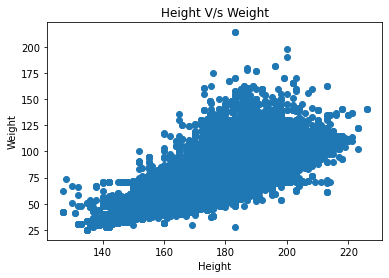

In [26]:
plt.scatter(a_df.Height,a_df.Weight)
plt.title("Height V/s Weight")
plt.xlabel("Height")
plt.ylabel("Weight")

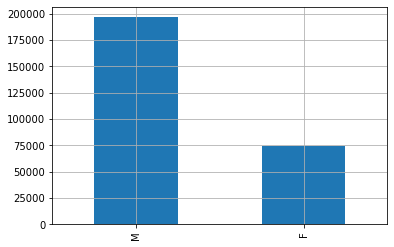

In [27]:
a_df['Gender'].value_counts().plot.bar(a_df['Gender'])
plt.grid()

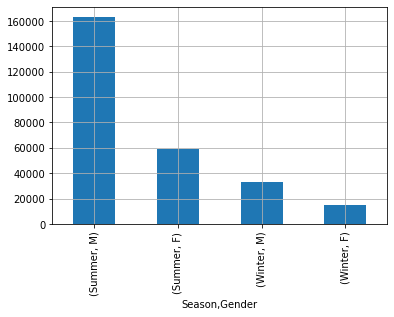

In [28]:
a_df['Gender'].groupby(a_df['Season']).value_counts().plot.bar(a_df['Gender'])
plt.grid()
plt.show()

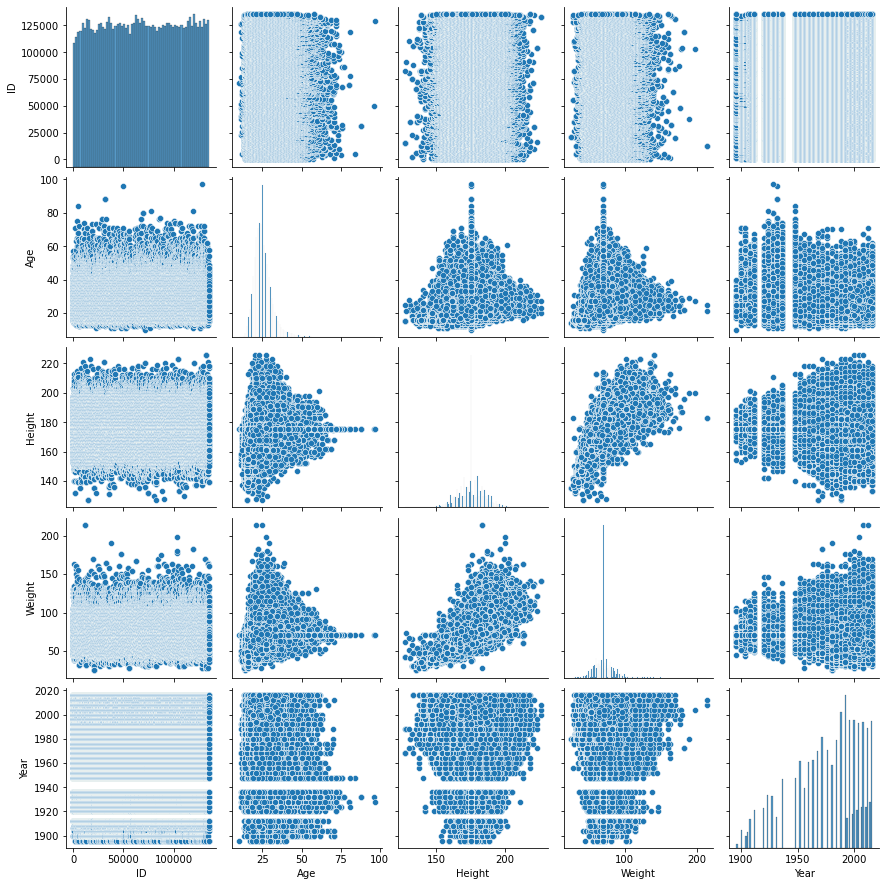

In [29]:
sns.pairplot(a_df)

<AxesSubplot:>

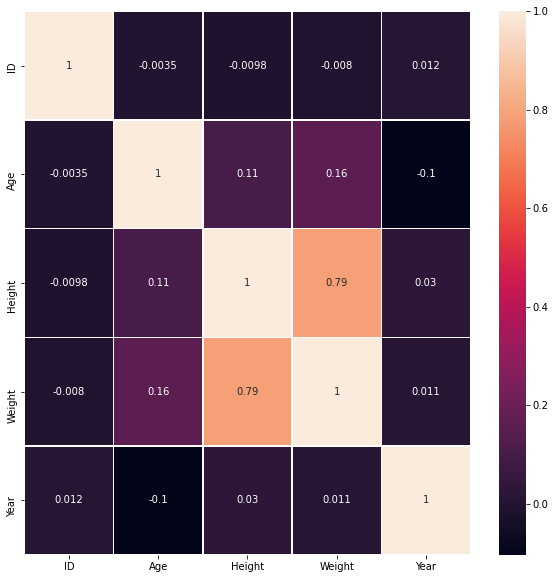

In [30]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(a_df.corr(),annot=True,linewidths=.5,ax=ax)

In [31]:
# ======================================================================================================================================== #